In [ ]:
# Imports and Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [ ]:
# Function to load dataset
def load_dataset(file_path):
    """
    Load the CSV dataset into a pandas DataFrame.
    Convert 'Date' column to datetime and sort the DataFrame by date.
    """
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    return df


In [ ]:
# Function to plot closing prices
def plot_closing_prices(df):
    """
    Plot the closing prices from the dataset.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Closing Prices', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('HDFC Bank Closing Prices')
    plt.legend()
    plt.grid(True)


In [ ]:
# Function to calculate trend line
def calculate_trend_line(dates, prices):
    """
    Calculate the trend line using linear regression.
    """
    z = np.polyfit(dates.map(datetime.toordinal), prices, 1)
    p = np.poly1d(z)
    return p


In [ ]:
# Function to plot trend line
def plot_trend_line(dates, trend_line):
    """
    Plot the trend line on the existing plot.
    """
    plt.plot(dates, trend_line(dates.map(datetime.toordinal)), "r--", label='Trend Line')


In [ ]:
# Function to add annotations
def add_annotations(df):
    """
    Add annotations to the plot for important dates or events.
    """
    max_price = df['Close'].max()
    max_date = df[df['Close'] == max_price]['Date'].values[0]
    plt.annotate('Max Price', xy=(max_date, max_price), xytext=(max_date, max_price + 100),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='right', verticalalignment='bottom')


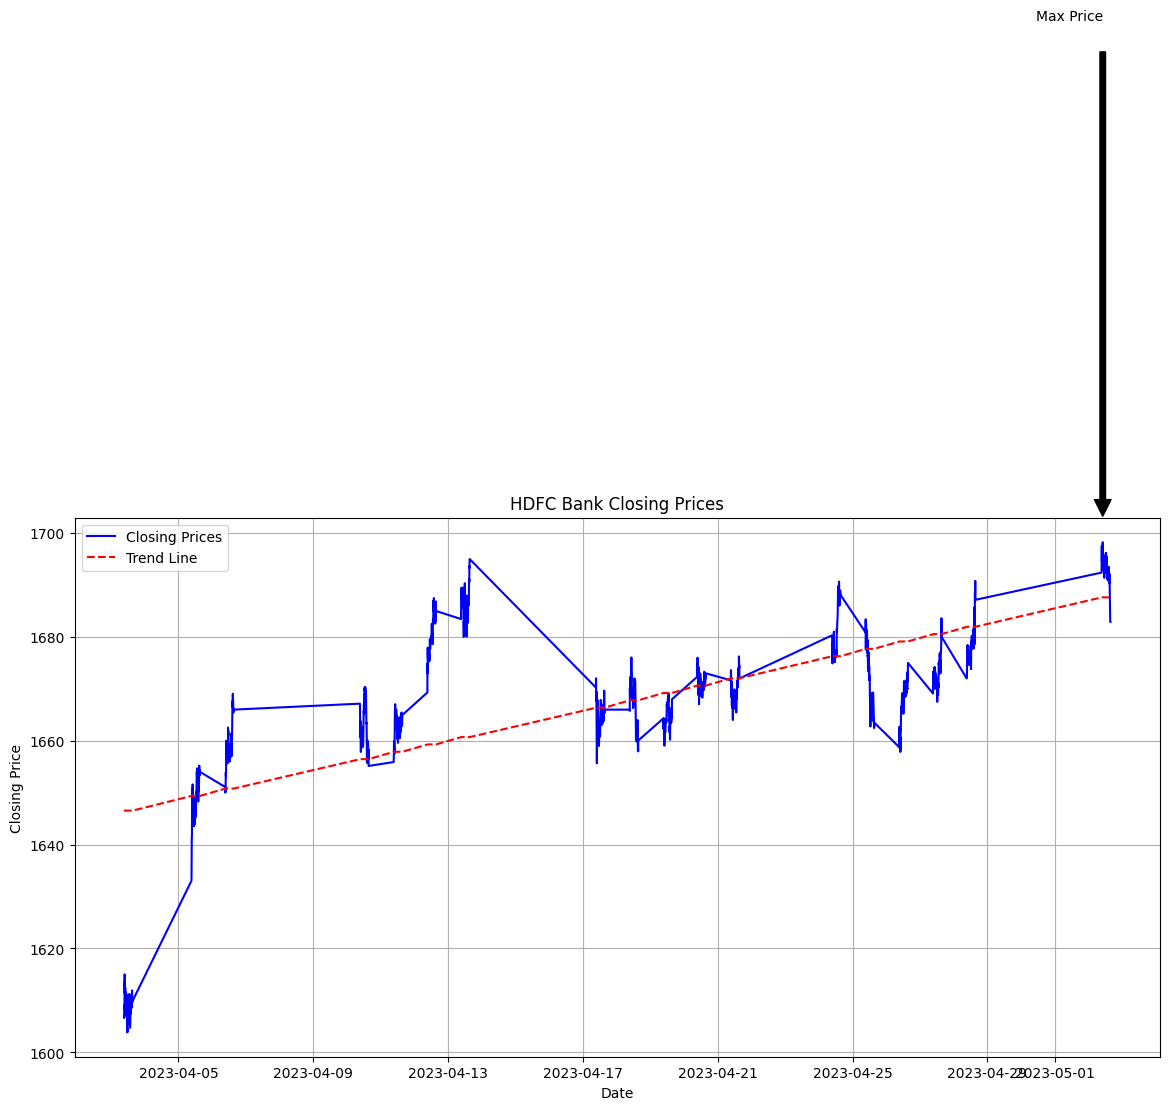

In [ ]:
# Main function
def main():
    # File path to the CSV file
    file_path = '/content/StockDataHDFCBAN'

    # Load the dataset
    df = load_dataset(file_path)

    # Plot the closing prices
    plot_closing_prices(df)

    # Calculate the trend line
    trend_line = calculate_trend_line(df['Date'], df['Close'])

    # Plot the trend line
    plot_trend_line(df['Date'], trend_line)

    # Add annotations (optional)
    add_annotations(df)

    # Show the plot
    plt.legend()
    plt.show()

# Entry point
if __name__ == "__main__":
    main()
